In [6]:
import numpy as np
import random
from copy import deepcopy
import matplotlib.pyplot as plt
import torchvision, cv2
from utils.visualizations import *
from utils.transforms import *
import utils.dataset as ds


In [3]:
import utils.dataset as ds
import torchvision, cv2
import importlib

importlib.reload(ds)

physionet = ds.PhysionetDataset(train=True)
slp = ds.SLPDataset(train=True)
cifar = torchvision.datasets.CIFAR10(root="./data", train=True, download=True)


Files already downloaded and verified


## Zero Component Analysis


In [3]:
from utils.transforms import *
import utils.transforms as tf
import importlib

importlib.reload(tf)

physionet_zca = deepcopy(physionet)
slp_zca = deepcopy(slp)
cifar_zca = deepcopy(cifar)
physionet_zca.x = zca(physionet_zca.x, epsilon=0.1)
slp_zca.x = np.load("./data/SLP/data_zca.npy")
cifar_zca.data = zca(cifar_zca.data, epsilon=0.1)


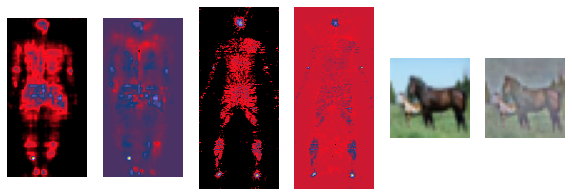

In [4]:
from utils.visualizations import *
import utils.visualizations as vi
import importlib

importlib.reload(vi)

image_row(
    physionet[0][0],
    physionet_zca[0][0],
    slp[0][0],
    slp_zca[0][0],
    cifar.data[12],
    cifar_zca.data[12],
)


## Samples


In [30]:
indices_per_class_physionet = {}
for i, label in enumerate(ds.PostureClass):
    indices_per_class_physionet[i] = np.where(physionet.y == i)[0]

indices_per_class_slp = {}
for i, label in enumerate(ds.PostureClass):
    indices_per_class_slp[i] = np.where(slp.y == i)[0]

physionet_samples = [
    sample
    for sample in map(
        lambda c: physionet[random.choice(c)] if len(c) > 0 else None,
        list(indices_per_class_physionet.values()) * 10,
    )
    if sample is not None
]

slp_samples = [
    sample
    for sample in map(
        lambda c: physionet[random.choice(c)] if len(c) > 0 else None,
        list(indices_per_class_slp.values()) * 10,
    )
    if sample is not None
]


## Basic Normalization


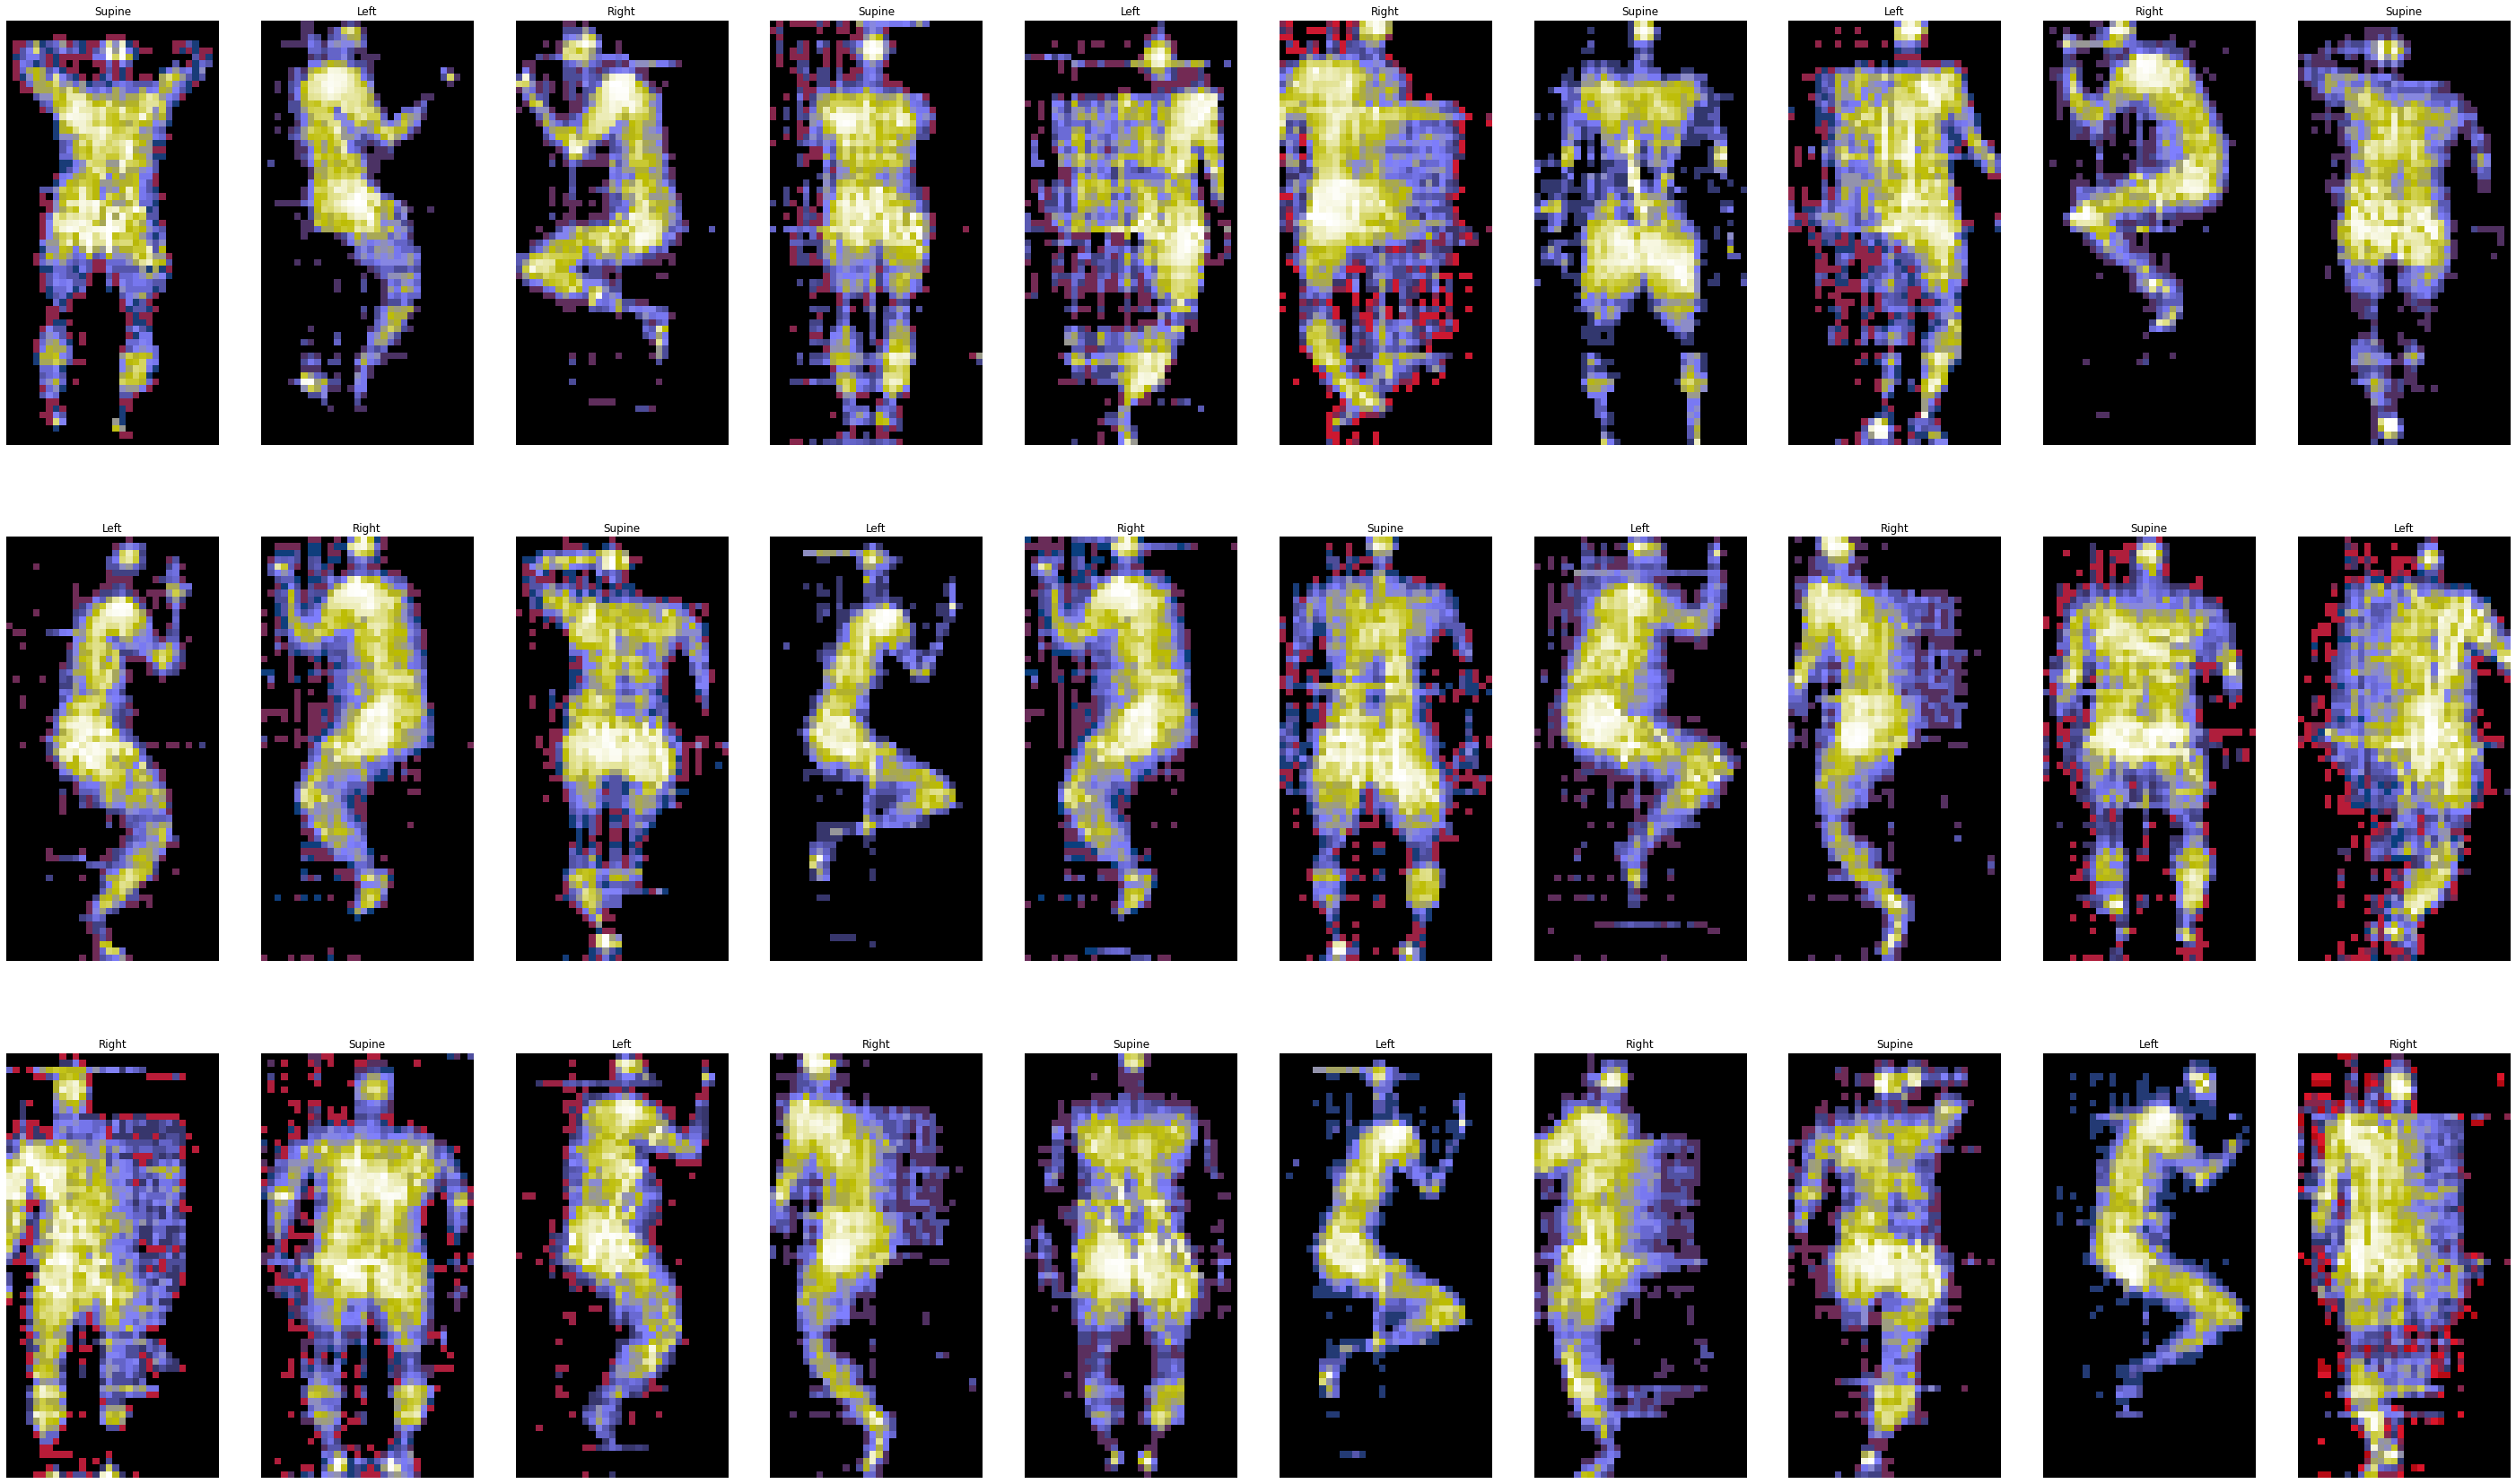

In [7]:
from utils.transforms import *
from utils.visualizations import *
import utils.transforms as tf
import utils.visualizations as vi
import importlib

importlib.reload(tf)
importlib.reload(vi)

plot_samples(
    physionet_samples,
    ncols=10,
    transform=torchvision.transforms.Compose(
        [
            Normalize(),
            EqualizeHist(),
        ]
    ),
)


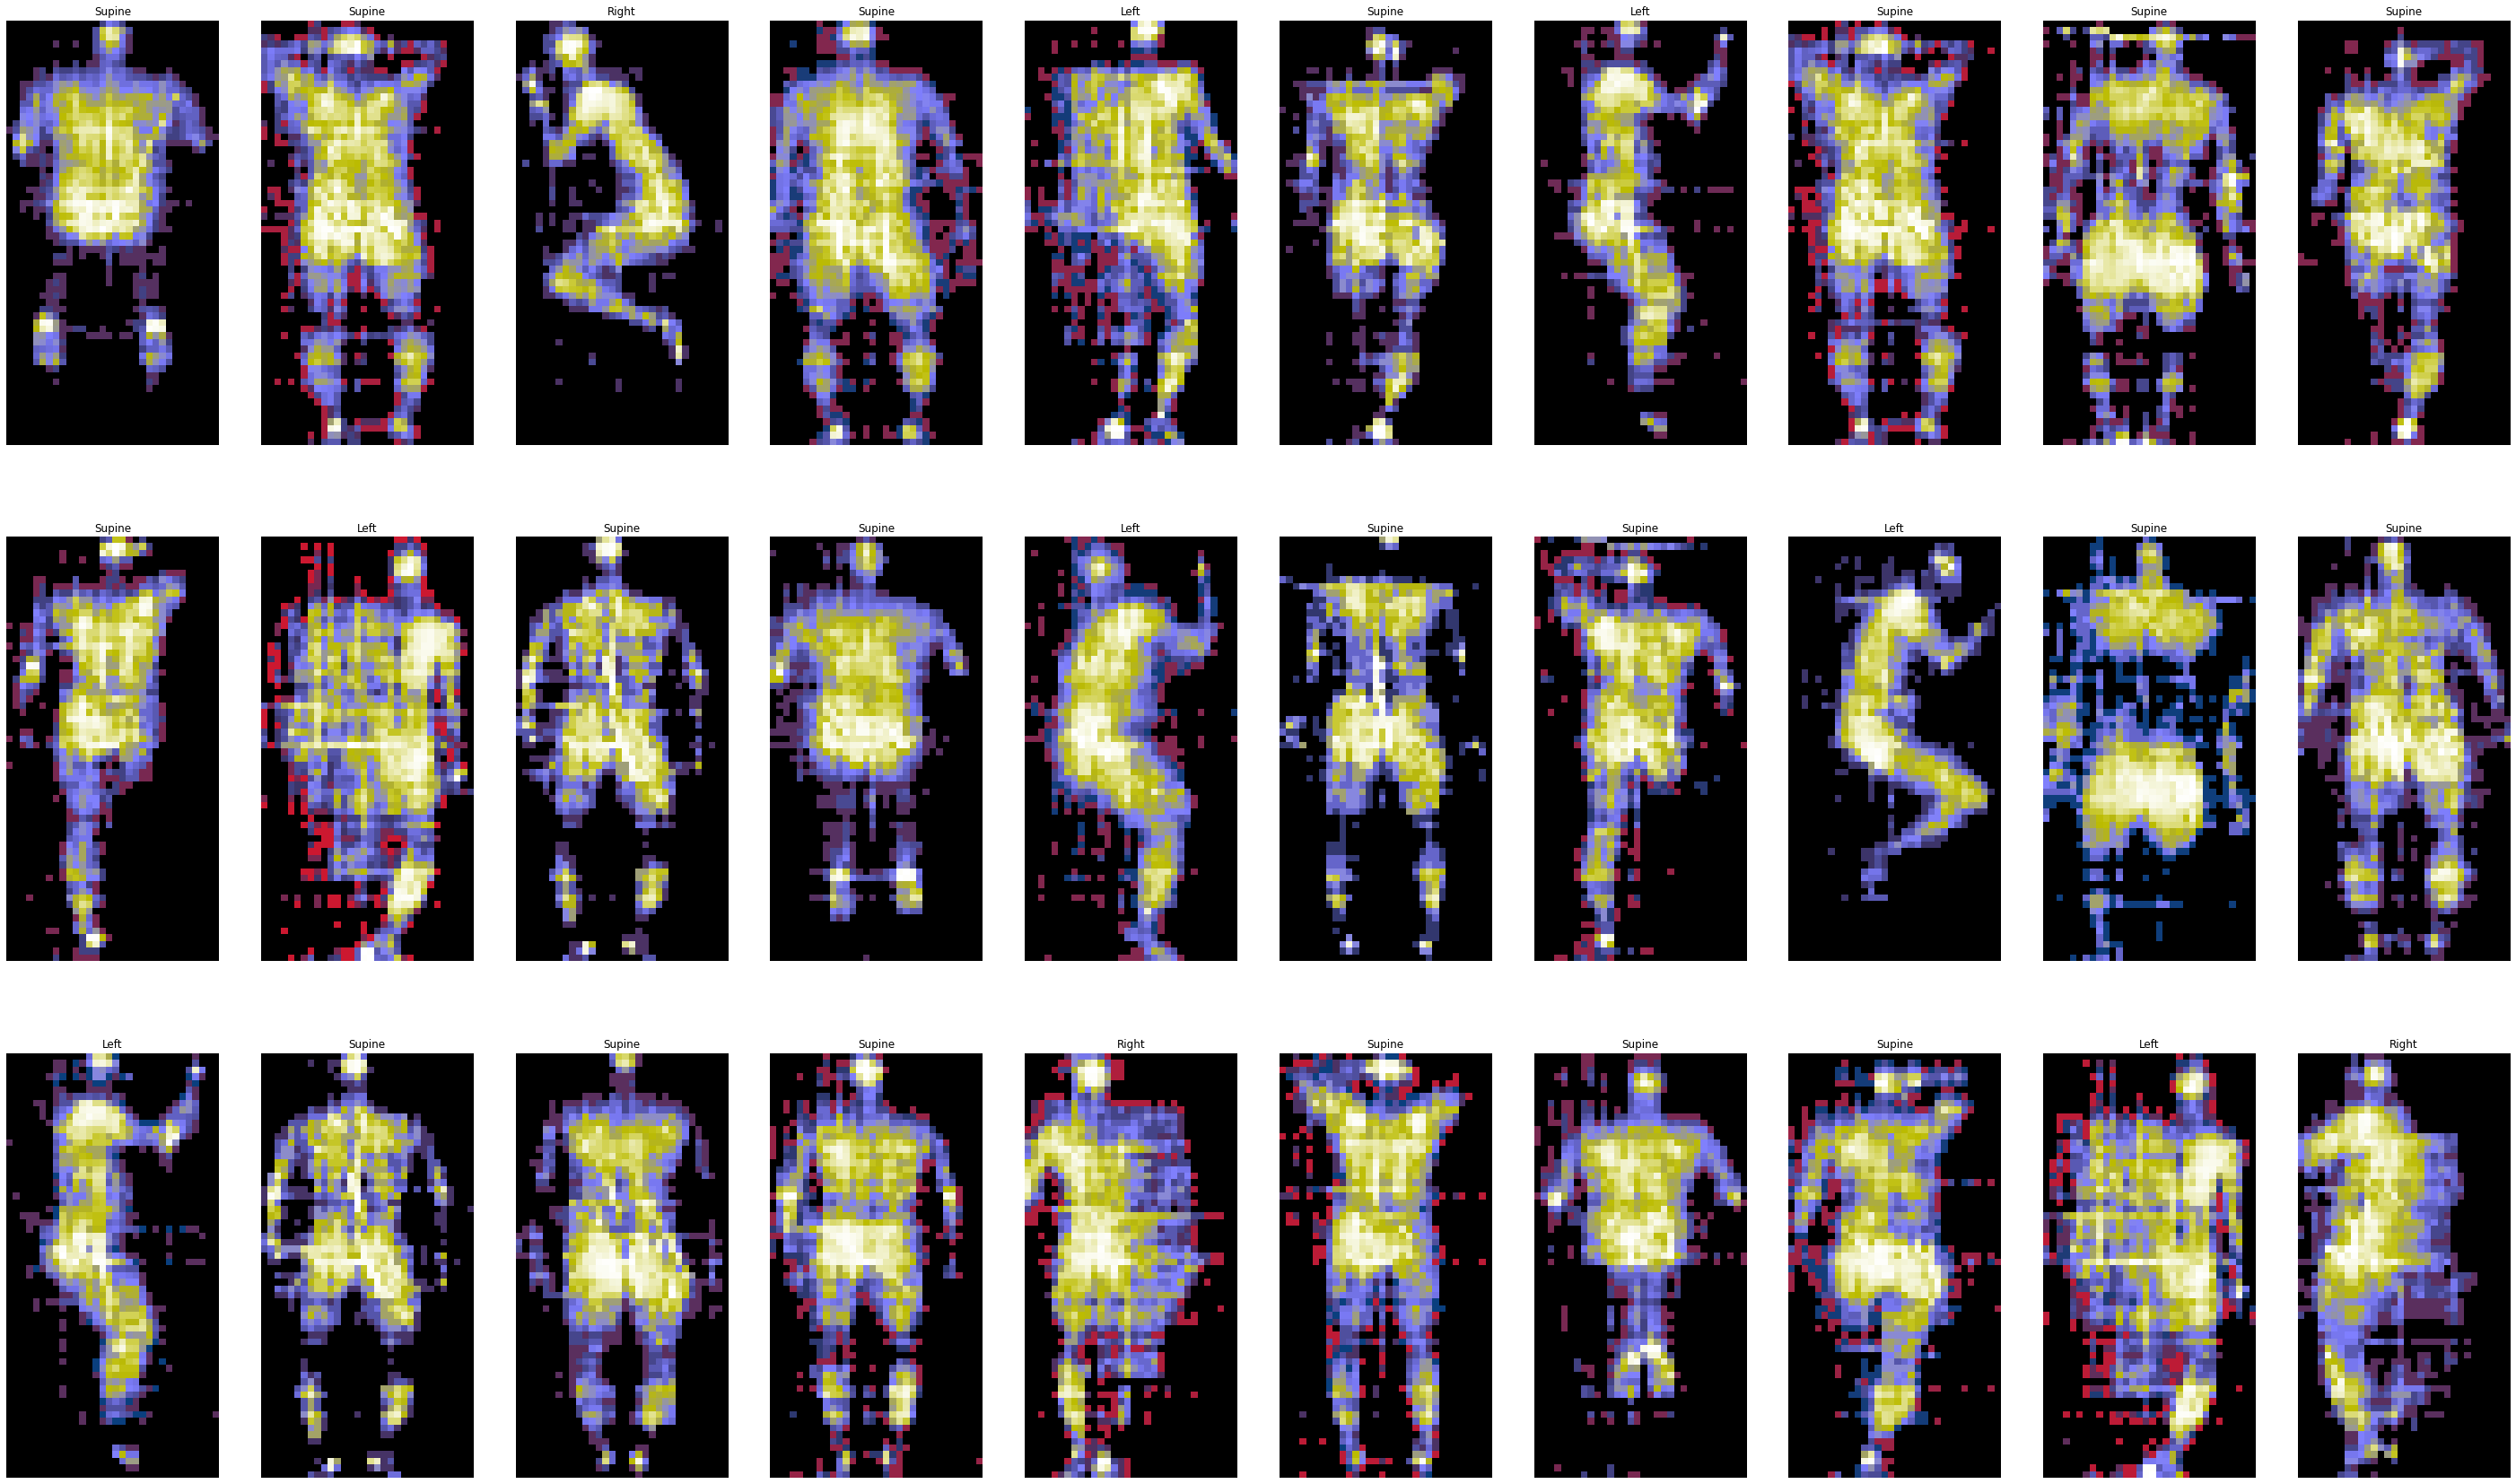

In [9]:
from utils.transforms import *
from utils.visualizations import *
import utils.transforms as tf
import utils.visualizations as vi
import importlib

importlib.reload(tf)
importlib.reload(vi)

plot_samples(
    slp_samples,
    ncols=10,
    transform=torchvision.transforms.Compose(
        [
            Normalize(),
            EqualizeHist(),
        ]
    ),
)


## Tranformation


In [32]:
basic_transform = [
    Normalize(),
    EqualizeHist(),
    Blur((3, 3)),
    Threshold(lambda img: np.median(img[img > 0.0])),
]


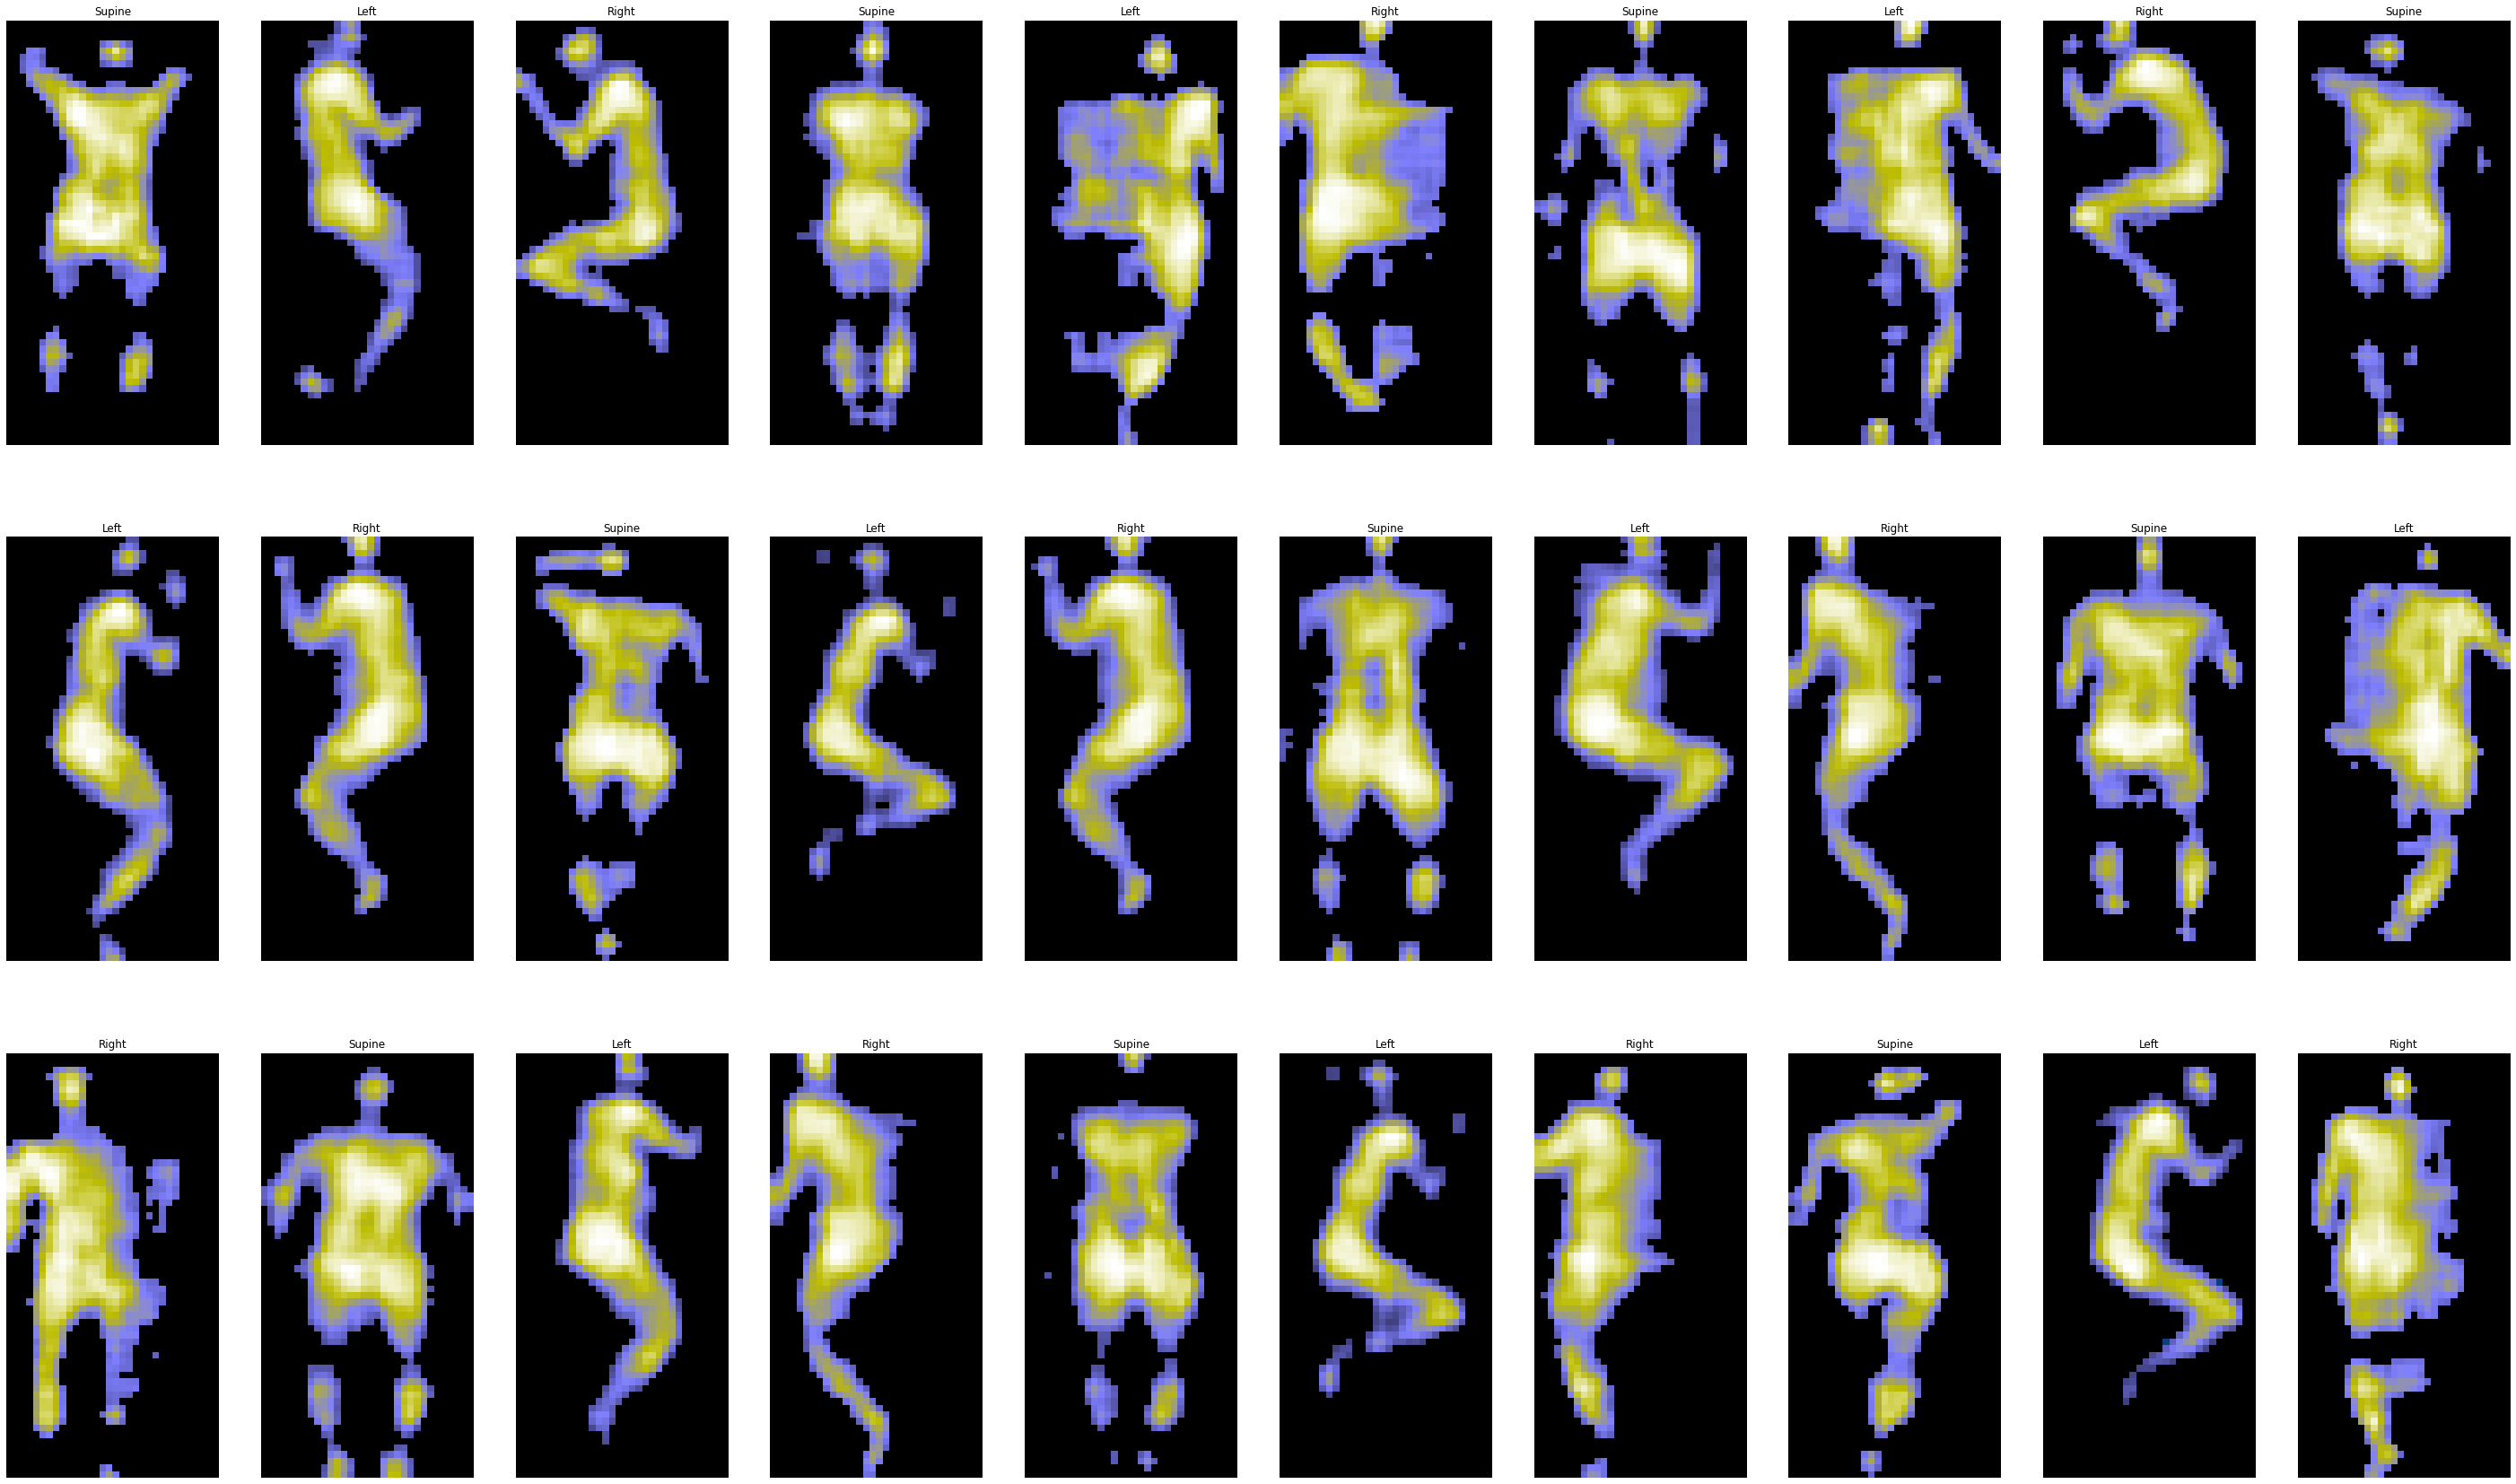

In [12]:
from utils.transforms import *
from utils.visualizations import *
import utils.transforms as tf
import utils.visualizations as vi
import importlib

importlib.reload(tf)
importlib.reload(vi)

plot_samples(
    physionet_samples,
    ncols=10,
    transform=torchvision.transforms.Compose(
        basic_transform,
    ),
)


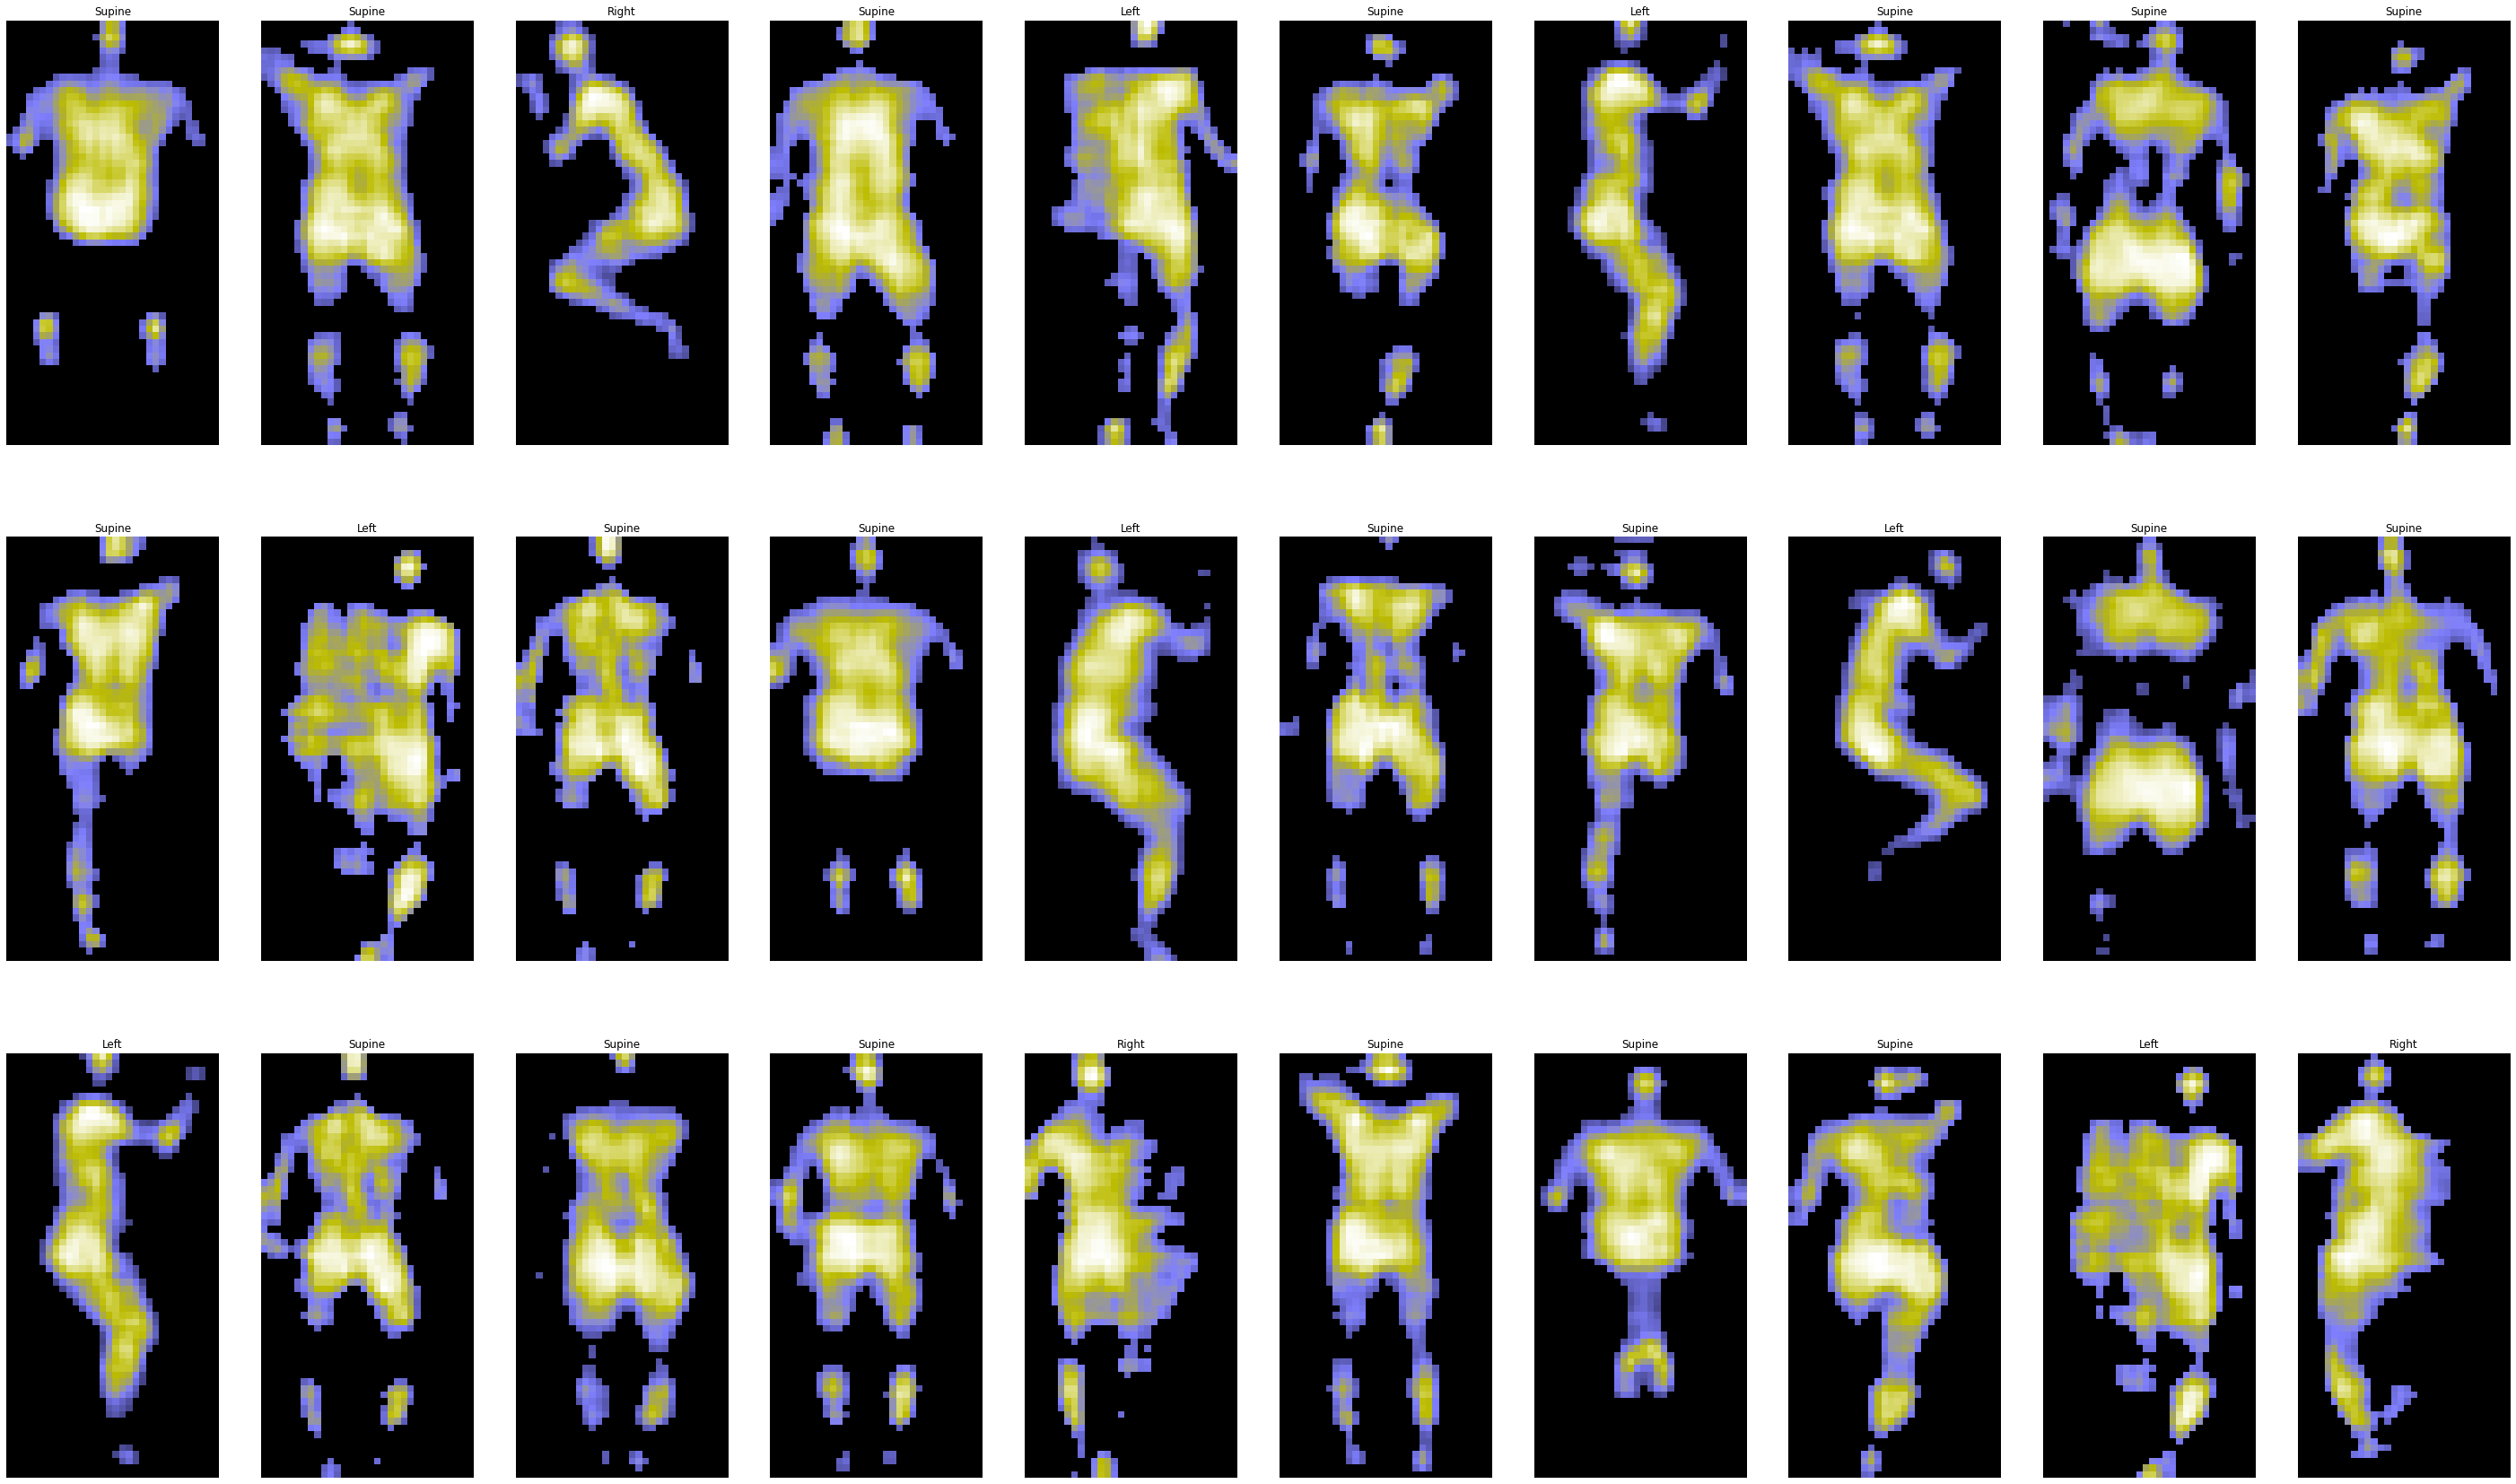

In [13]:
from utils.transforms import *
from utils.visualizations import *
import utils.transforms as tf
import utils.visualizations as vi
import importlib

importlib.reload(tf)
importlib.reload(vi)

plot_samples(
    slp_samples,
    ncols=10,
    transform=torchvision.transforms.Compose(
        basic_transform,
    ),
)


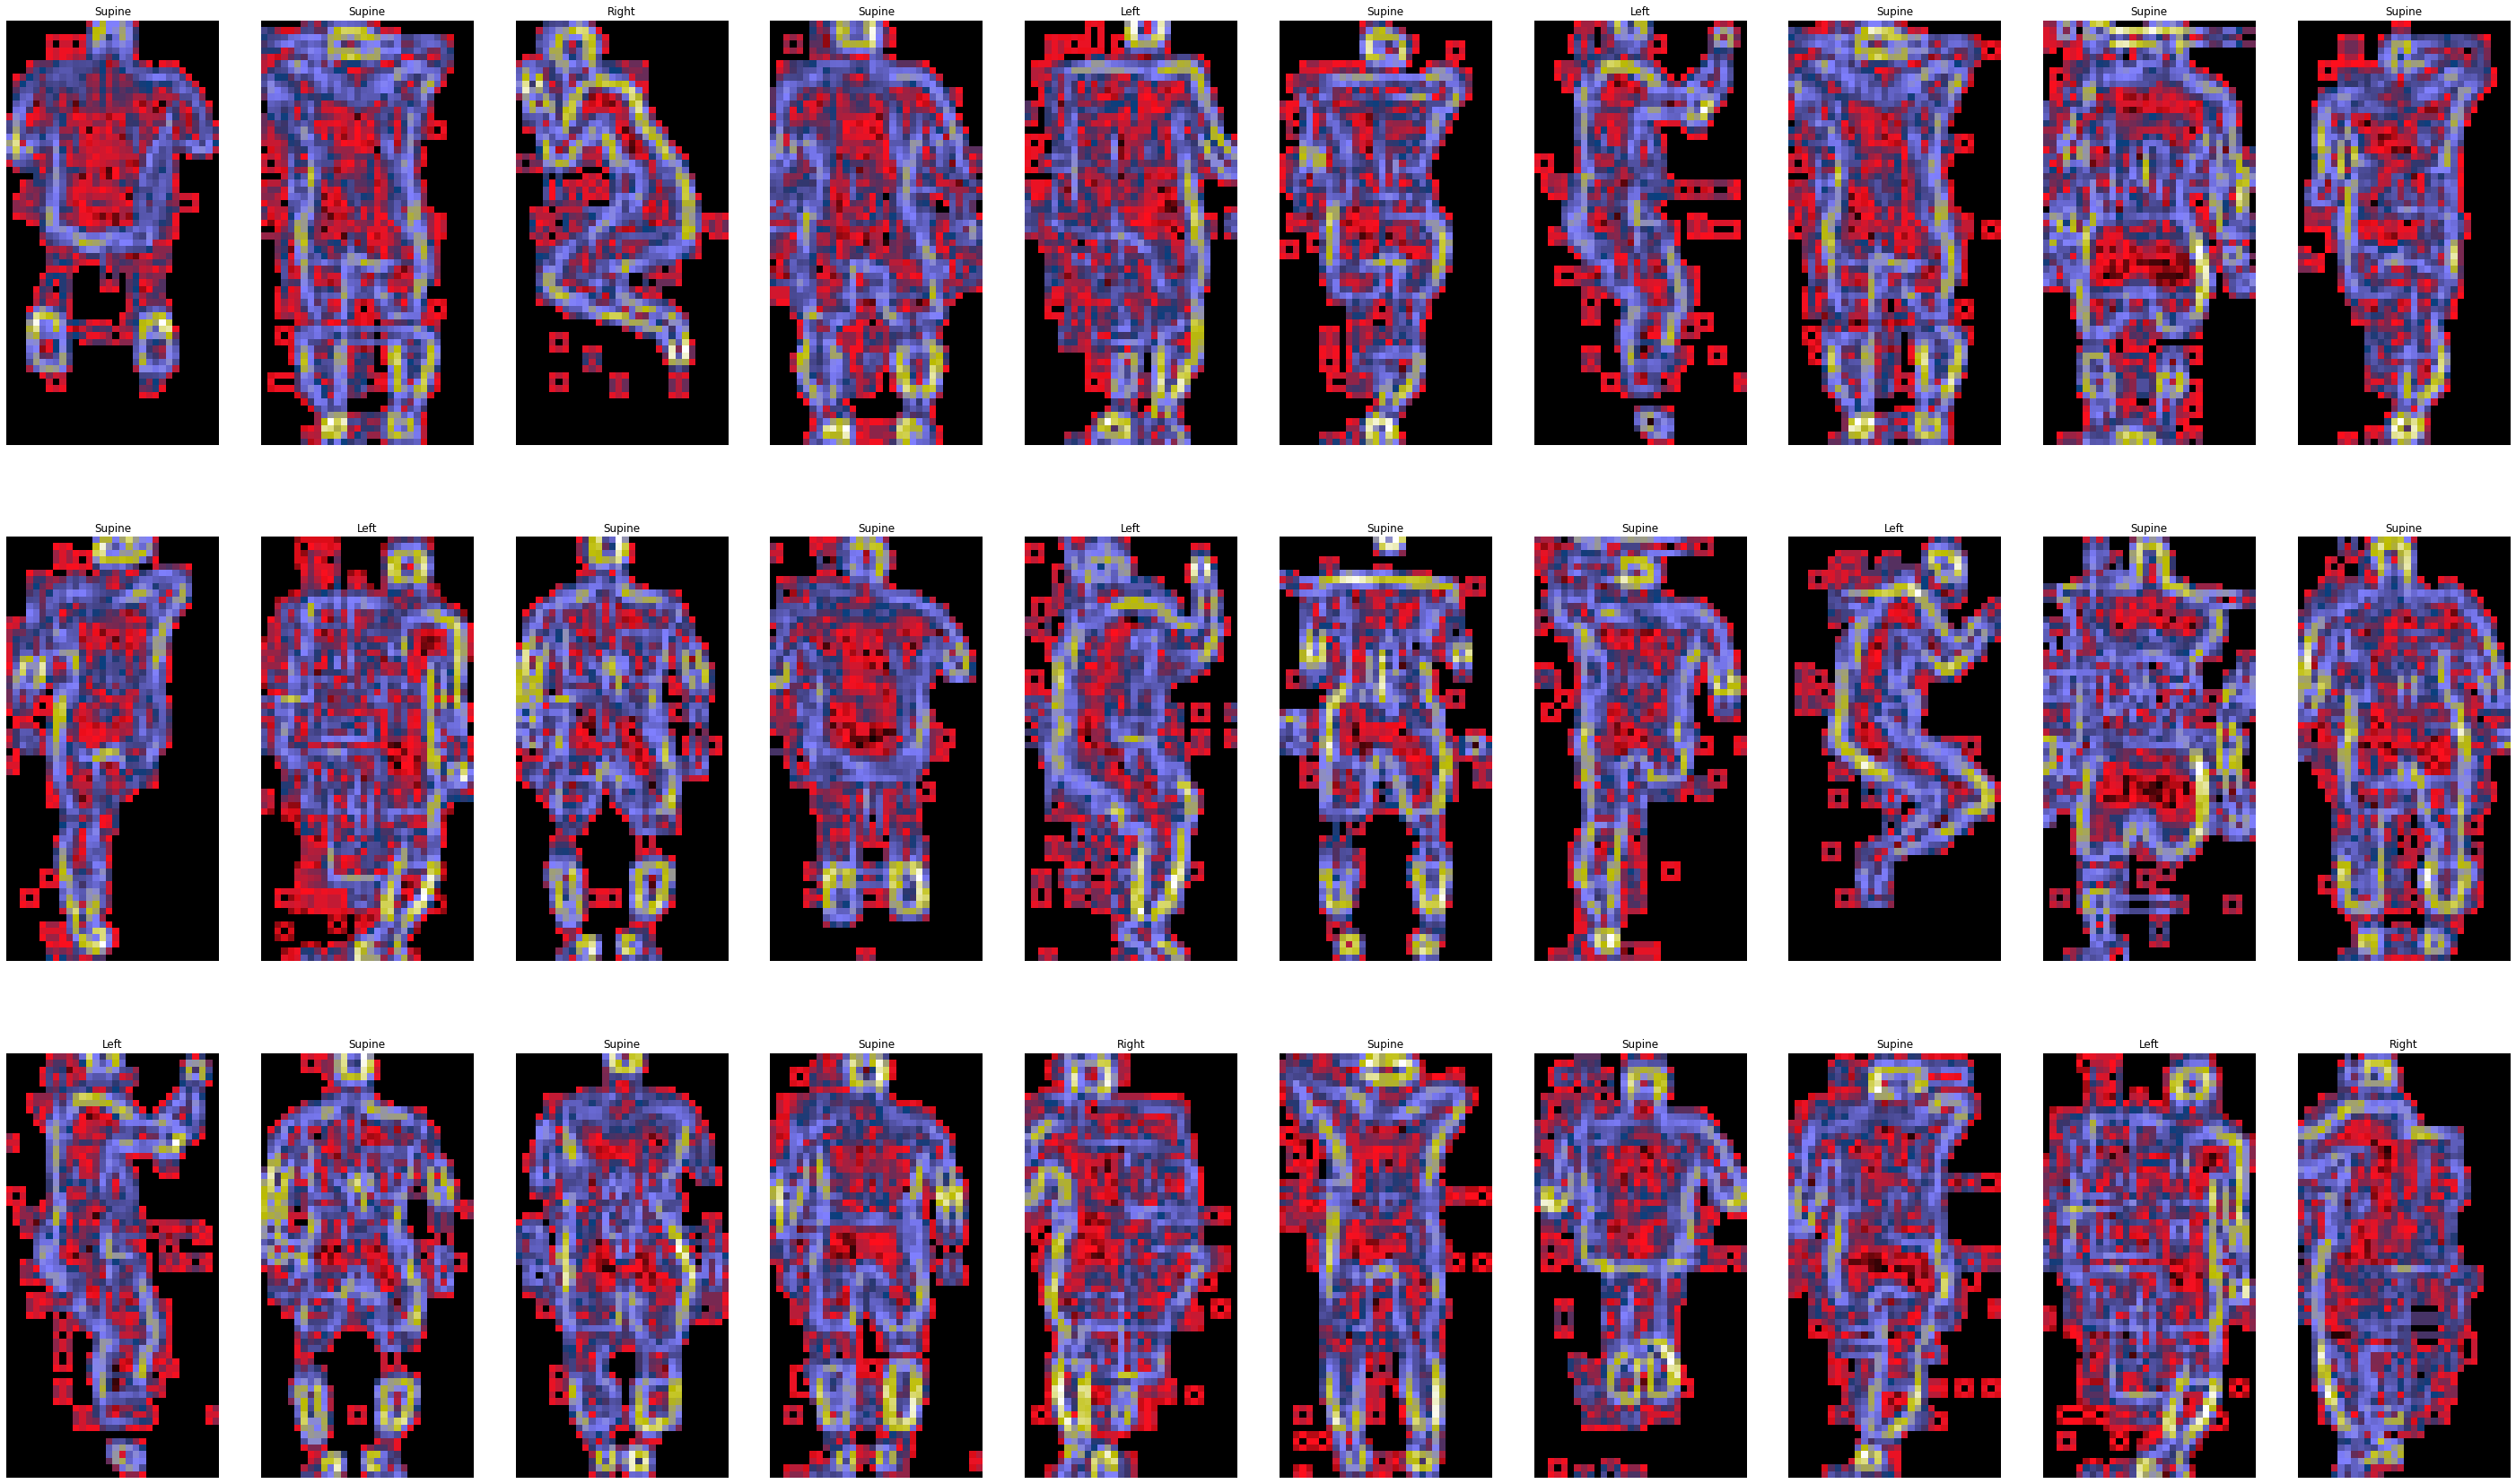

In [25]:
from utils.transforms import *
from utils.visualizations import *
import utils.transforms as tf
import utils.visualizations as vi
import importlib

importlib.reload(tf)
importlib.reload(vi)

plot_samples(
    slp_samples,
    ncols=10,
    transform=torchvision.transforms.Compose(
        [
            Normalize(),
            EqualizeHist(),
            Sobel(),
            # Blur((3, 3)),
            # Close((2, 2), ktype=cv2.MORPH_CROSS, iterations=2),
            # Threshold(lambda img: np.median(img[img > 0.0])),
            # Laplace(),
        ]
    ),
)


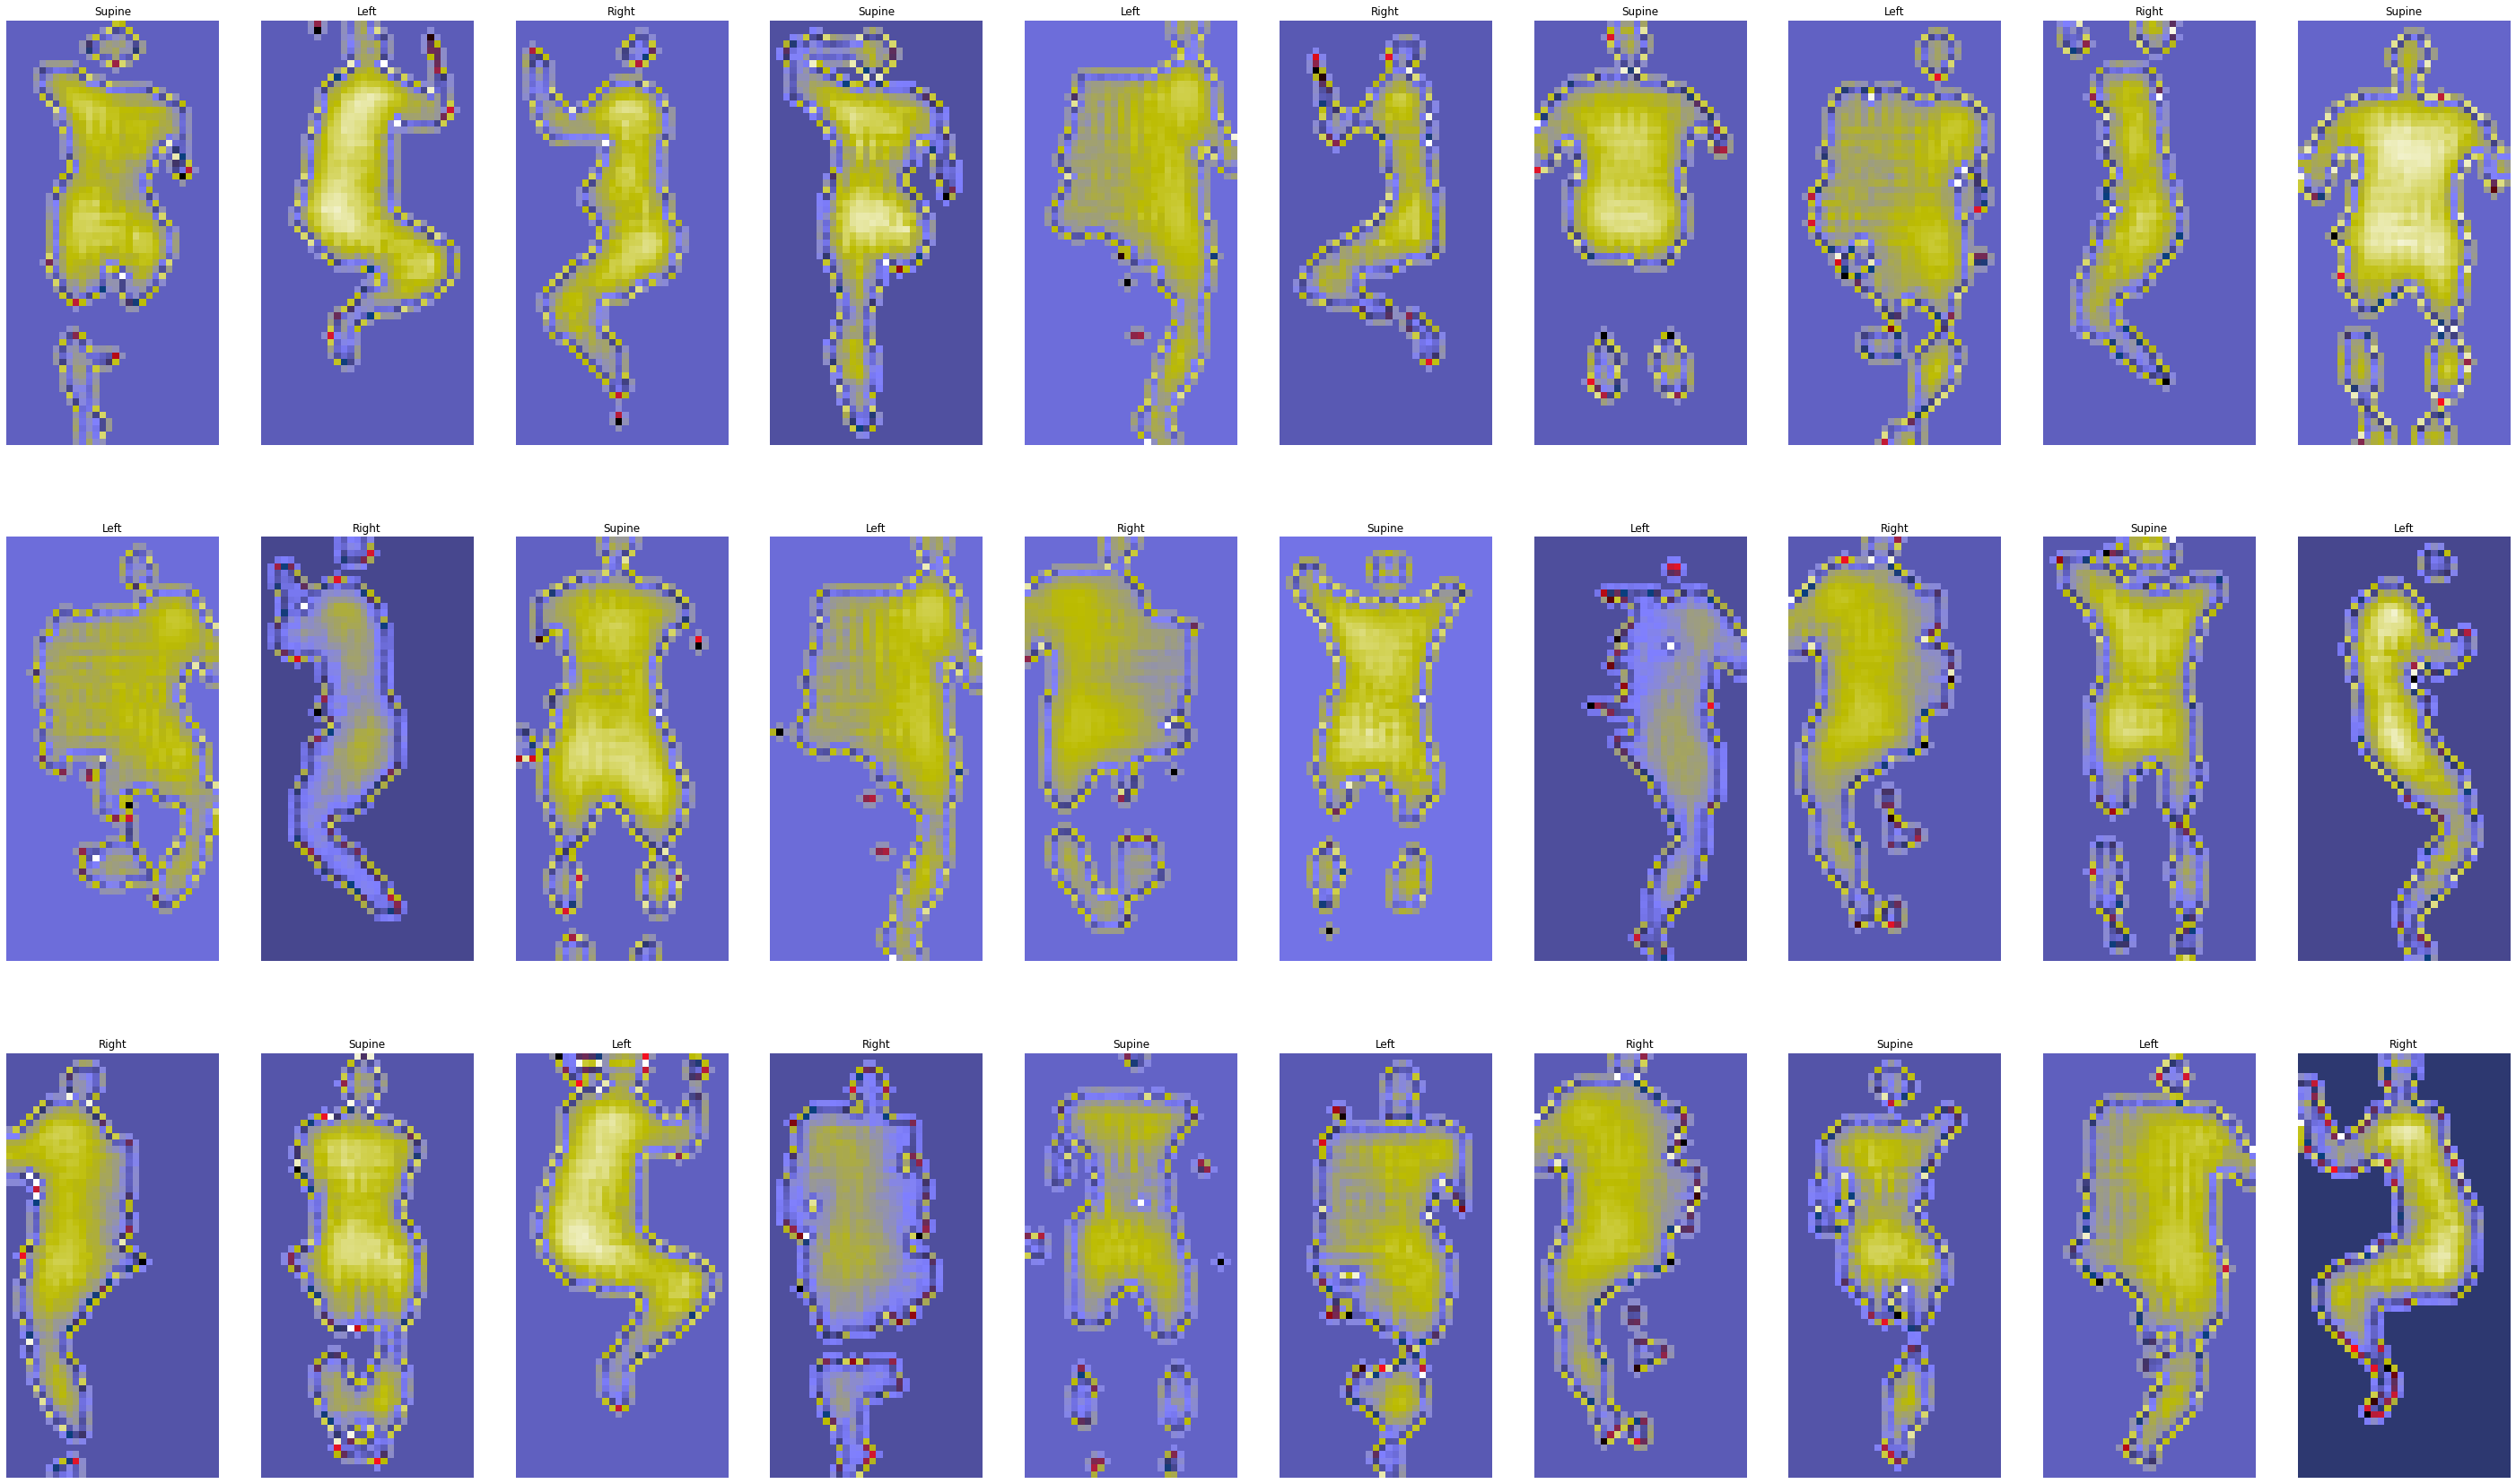

In [33]:
from utils.transforms import *
from utils.visualizations import *
import utils.transforms as tf
import utils.visualizations as vi
import importlib

importlib.reload(tf)
importlib.reload(vi)

plot_samples(
    physionet_samples,
    ncols=10,
    transform=torchvision.transforms.Compose(
        [
            *basic_transform,
            Laplace(),
        ]
    ),
)


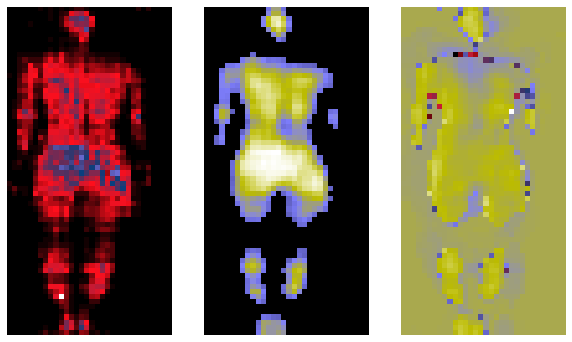

In [49]:
from utils.transforms import *
from utils.visualizations import *
import utils.transforms as tf
import utils.visualizations as vi
import importlib

importlib.reload(tf)
importlib.reload(vi)

transforms = torchvision.transforms.Compose(basic_transform)

physionet_transformed = np.array(
    list(map(lambda i: i[0], [transforms(sample) for sample in physionet]))
)
zca_transformed_physionet = zca(physionet_transformed, epsilon=0.1)

image_row(physionet[0][0], physionet_transformed[0], zca_transformed_physionet[0])


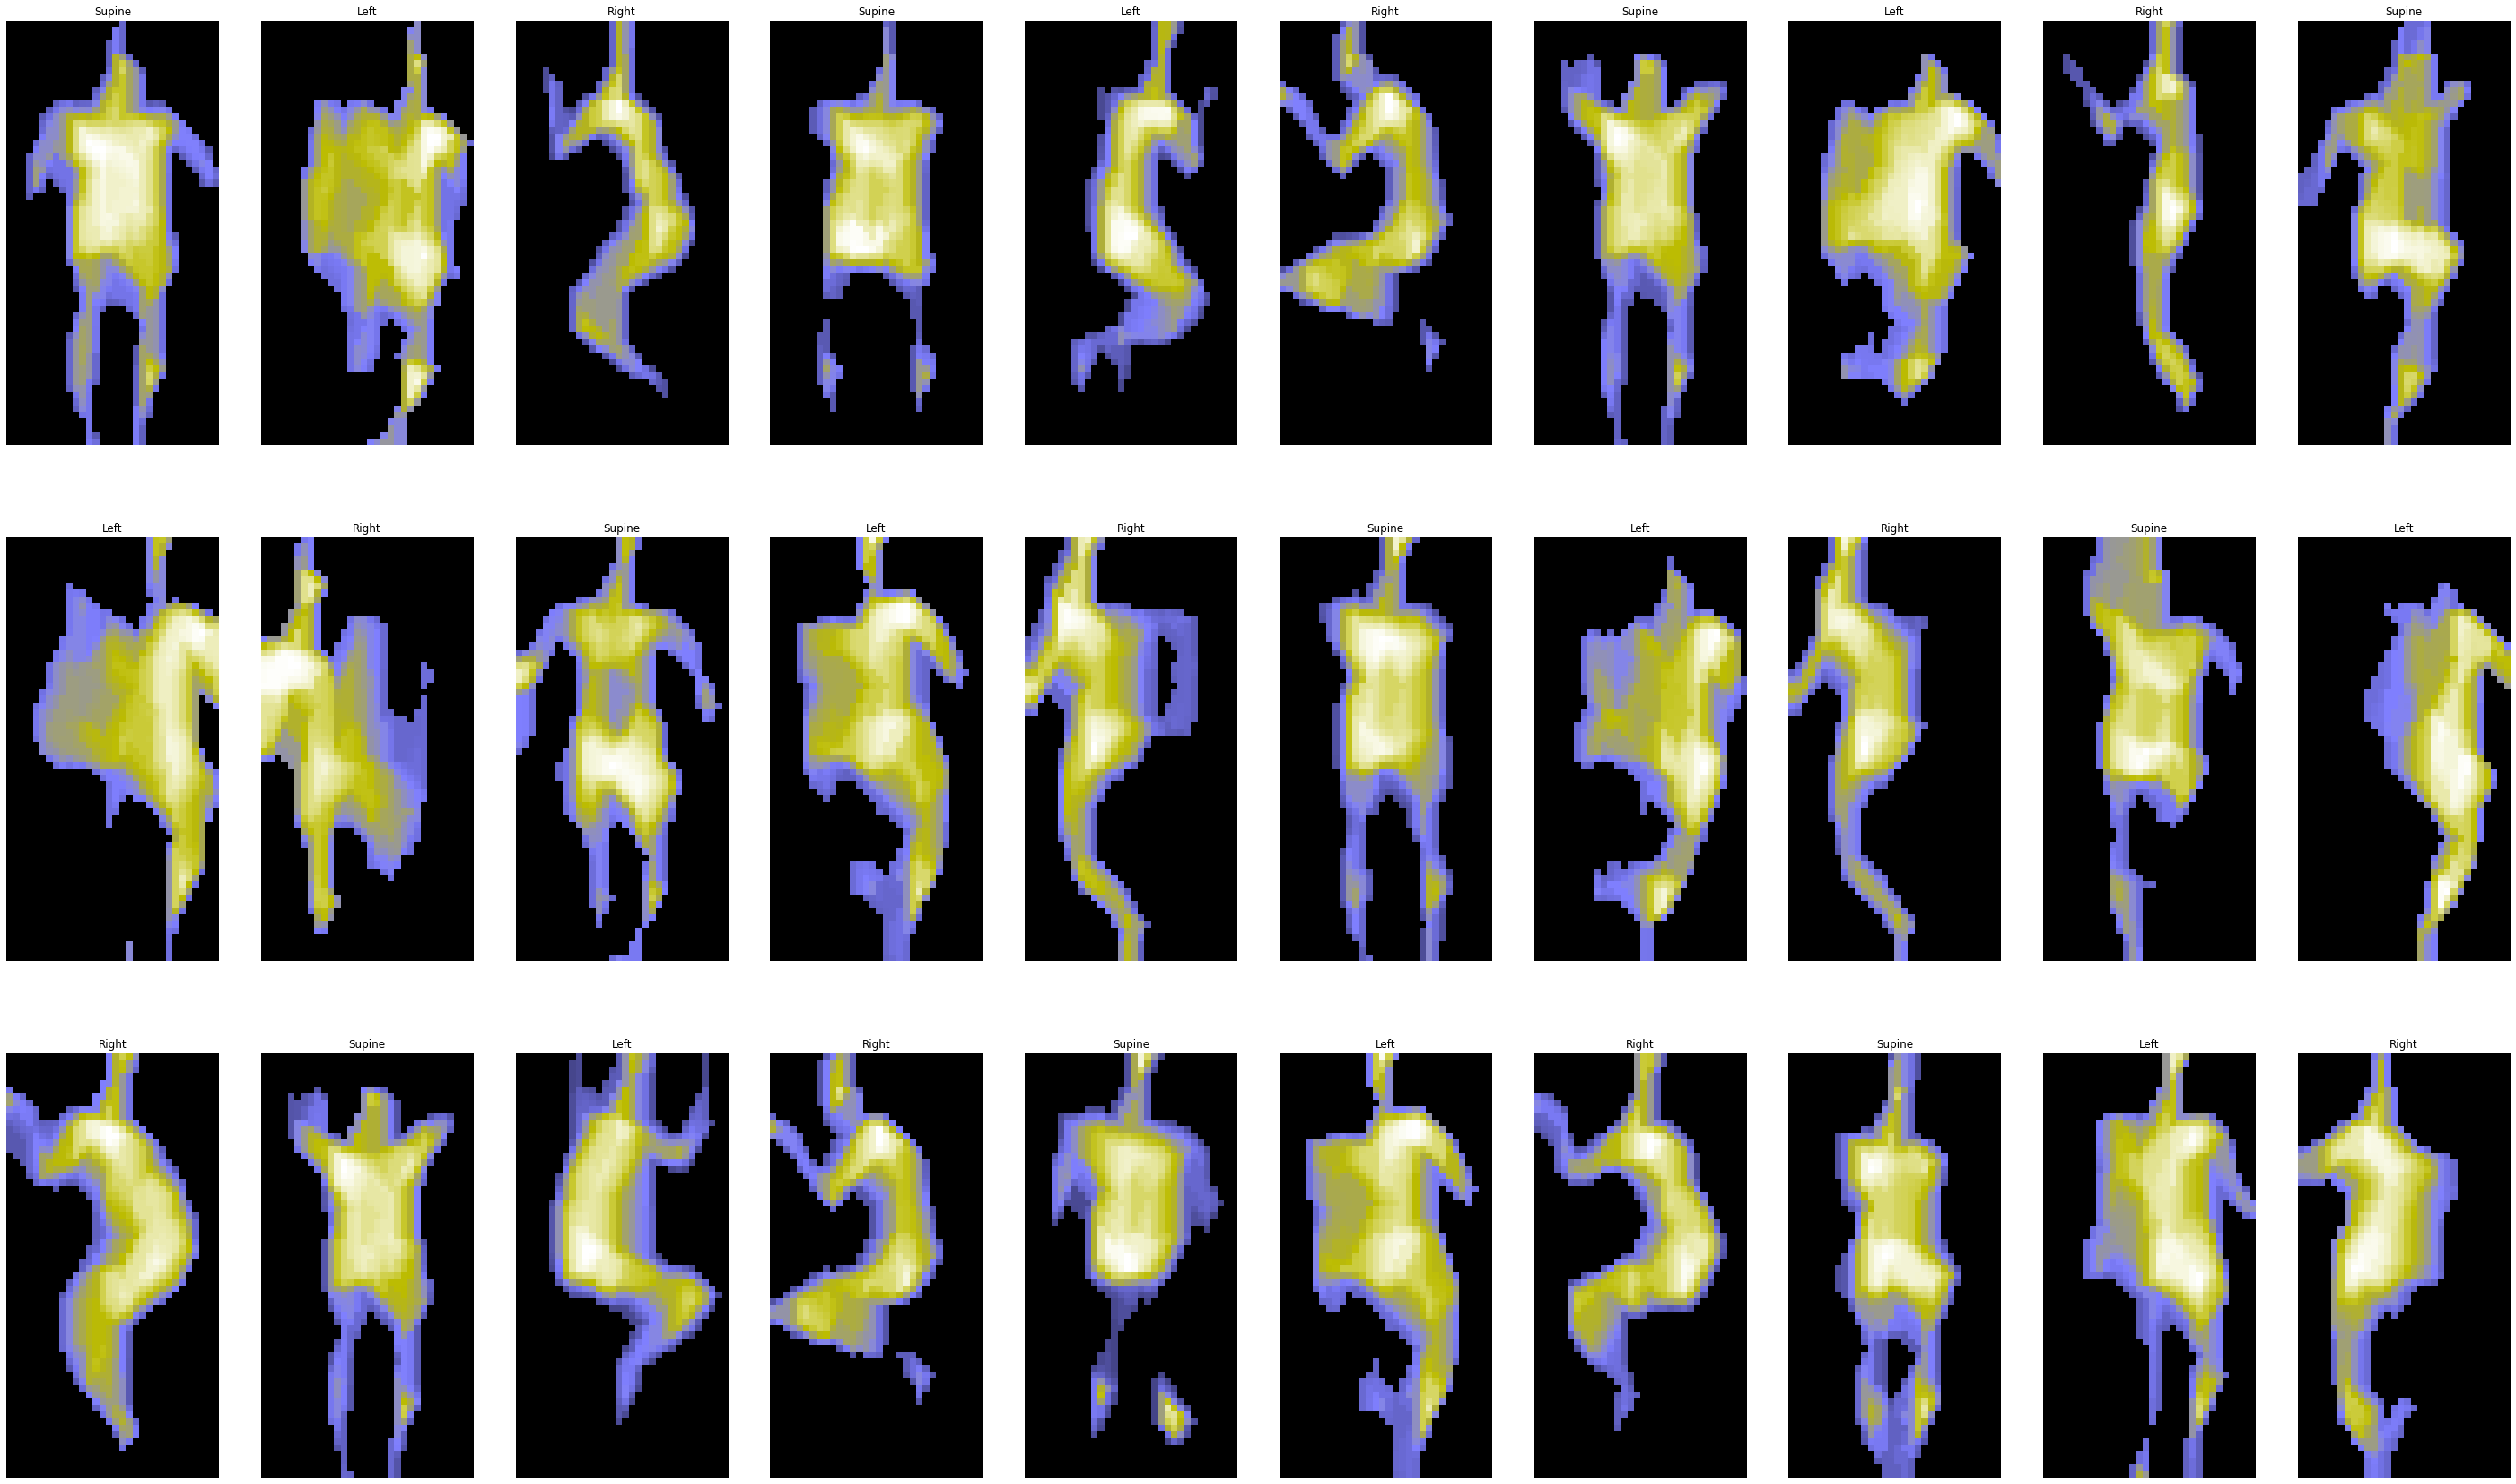

In [52]:
plot_samples(
    samples,
    ncols=10,
    transform=torchvision.transforms.Compose(
        [
            *basic_transform,
            Close((2, 4), ktype=cv2.MORPH_CROSS, iterations=2),
            # Erode((2,2), ktype=cv2.MORPH_CROSS, iterations=2),
            # Close((3,3), ktype=cv2.MORPH_CROSS, iterations=2),
        ]
    ),
)


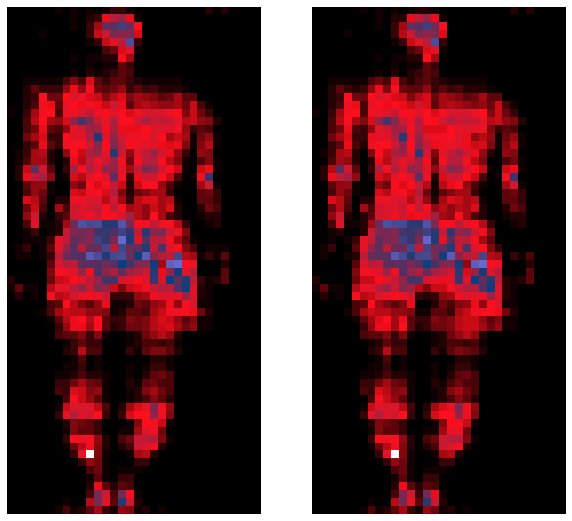

In [58]:
from utils.transforms import *
from utils.visualizations import *
import utils.transforms as tf
import utils.visualizations as vi
import importlib

importlib.reload(tf)
importlib.reload(vi)

transforms = torchvision.transforms.Compose(
    [
        Normalize(),
        RollingBall(radius=75),
    ]
)

sample = physionet[0]
image = sample[0]

vi.image_row(image, transforms(sample)[0])


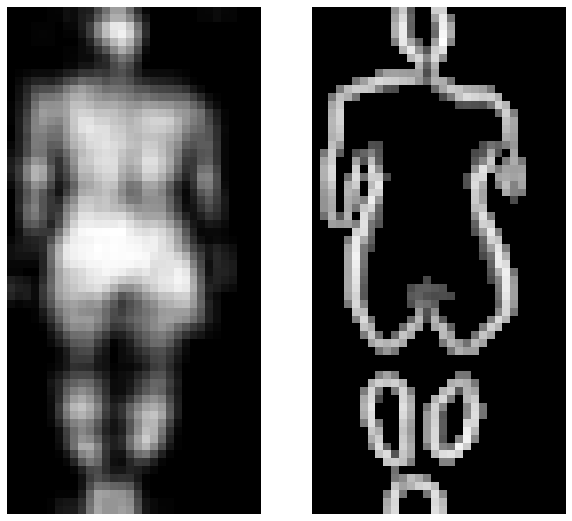

In [62]:
from utils.transforms import *
from utils.visualizations import *
import utils.transforms as tf
import utils.visualizations as vi
import importlib

importlib.reload(tf)
importlib.reload(vi)

transforms_base = [
    *basic_transform,
    Sobel(),
    # Blur((3, 3)),
    Threshold(lambda img: np.median(img[img > 0.0])),
]

base_transform = torchvision.transforms.Compose(transforms_base[:3])
sobel_transform = torchvision.transforms.Compose(transforms_base)

sample = base_transform(physionet[0])
sobel = sobel_transform(sample)

image_row(sample[0], sobel[0], cmap="gray")


C:\Users\Jannis\AppData\Local\Temp\ipykernel_20052\314229192.py:20: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = np.log(np.abs(fshift))


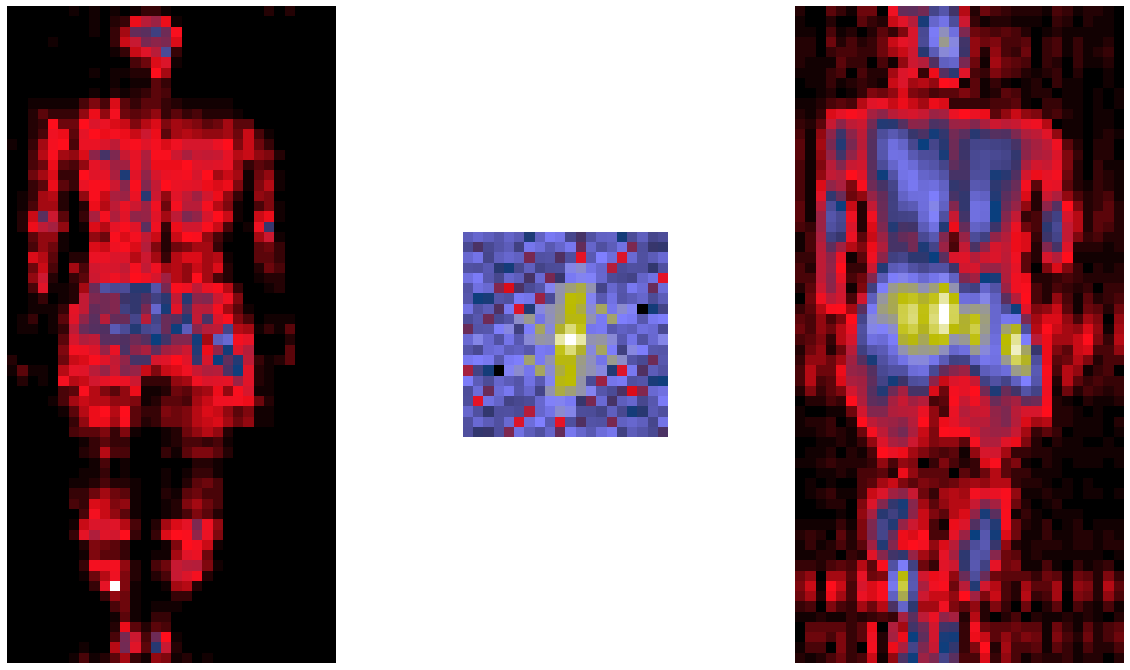

In [48]:
from utils.transforms import *
from utils.visualizations import *
import utils.transforms as tf
import utils.visualizations as vi
import importlib

importlib.reload(tf)
importlib.reload(vi)
from skimage import data, filters


def low_pass(img, rad=60):
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)

    rows, cols = image.shape
    crow, ccol = int(rows / 2), int(cols / 2)
    low_pass_filter = np.zeros(fshift.shape)
    low_pass_filter[crow - rad : crow + rad, ccol - rad : ccol + rad] = 1
    fshift *= low_pass_filter
    magnitude_spectrum = np.log(np.abs(fshift))
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    return np.abs(img_back), magnitude_spectrum


def high_pass(img, rad=60):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    crow, ccol = tuple(ti // 2 for ti in image.shape)
    fshift[crow - rad : crow + rad, ccol - rad : ccol + rad] = 0
    manip_magnitude_spectrum = np.log(np.abs(fshift))
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    return np.abs(img_back), manip_magnitude_spectrum


image = physionet[0][0]
img_back, magnitude_spectrum = low_pass(image, 10)

image_row(
    image,
    magnitude_spectrum,
    img_back,
    # cmap="gray",
    figsize=(20, 20),
)


Notes
* Just doing threshold for denoising removes the loose contact between the legs
* Trying out low-/high-pass filter didnt really improve the image, might have to try out some other fourier transforms
* using a denoising function from cv2 still leaves low-value artifacts in the image but does a fairly good job at removing outliers
  + this can be tweaked with many parameters, which might have to be chosen for each image independently
* Using threshold on the outcome of that left the legs more intact than directly theresholding, which is good
* so the cv2 function basically lowered the pixel values of noise pixels which is why we can use a lower threshold then to remove that without breaking the legs


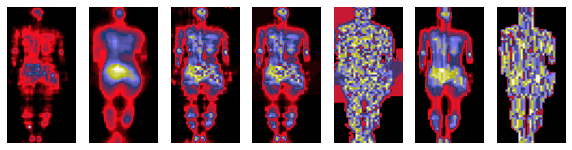

In [28]:
import cv2

image = physionet[0][0]
img = np.uint8(image)
denoised = cv2.fastNlMeansDenoising(img, None, 9, 7, 21)
denoised_thr = torchvision.transforms.Compose(
    [
        Threshold(lambda i: np.median(i)),
        # Blur((3, 3)),
        # Threshold(lambda i: np.median(i)),
        Close((1, 4)),
        # Blur((3, 3)),
    ]
)((denoised, 0))[0]

image_row(
    image,
    cv2.medianBlur(image, 5),
    img,
    denoised,
    denoised * 25,
    denoised_thr,
    denoised_thr * 25,
)
